(-0.5, 4255.5, 2831.5, -0.5)

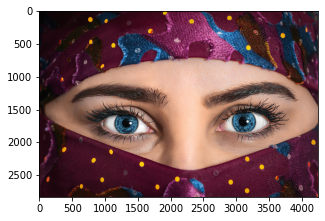

In [8]:
from matplotlib.image import imread
import numpy as np
import PIL
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys


plt.rcParams['figure.figsize']=[5,5]
plt.rcParams.update({'font.size':10})
path=r'image_load.jpg'
A = plt.imread(path)
B = np.mean(A,-1); #convert RGB to grayscale
plt.figure()
plt.imshow(A) #, cmap='gray_r'
#plt.imsave(f'./image.jpg', A)
plt.axis('on')


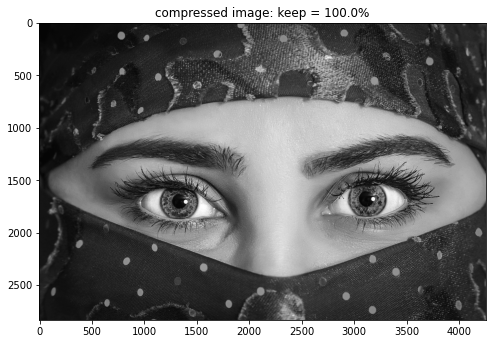

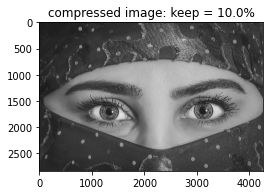

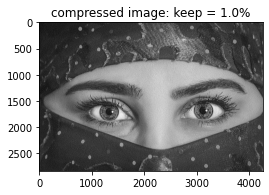

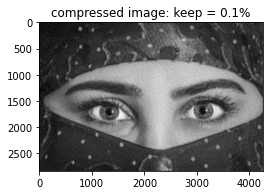

In [7]:
Bt=np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(- 1))) # sort by magnitude

#Zero out all small coefficient and inverse transform
arr = (1.0, 0.1, 0.01, 0.001)
for i, keep in enumerate(arr):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh # Find small indices
    Btlow = Bt  * ind # Threshold small indices
    Alow = np.fft.ifft2(Btlow).real
    
    plt.figure()
    plt.imshow(Alow, cmap= 'gray')
    plt.imsave(f'./image{i}.jpg', Alow)
    plt.axis('on')
    plt.rcParams['figure.figsize']=[4,3]
    plt.title('compressed image: keep = ' + str(keep*100) + '%')

   

    